In [1]:
! pip install chembl_webresource_client
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 63.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [3]:
target = new_client.target
target_query = target.search('alzheimer')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


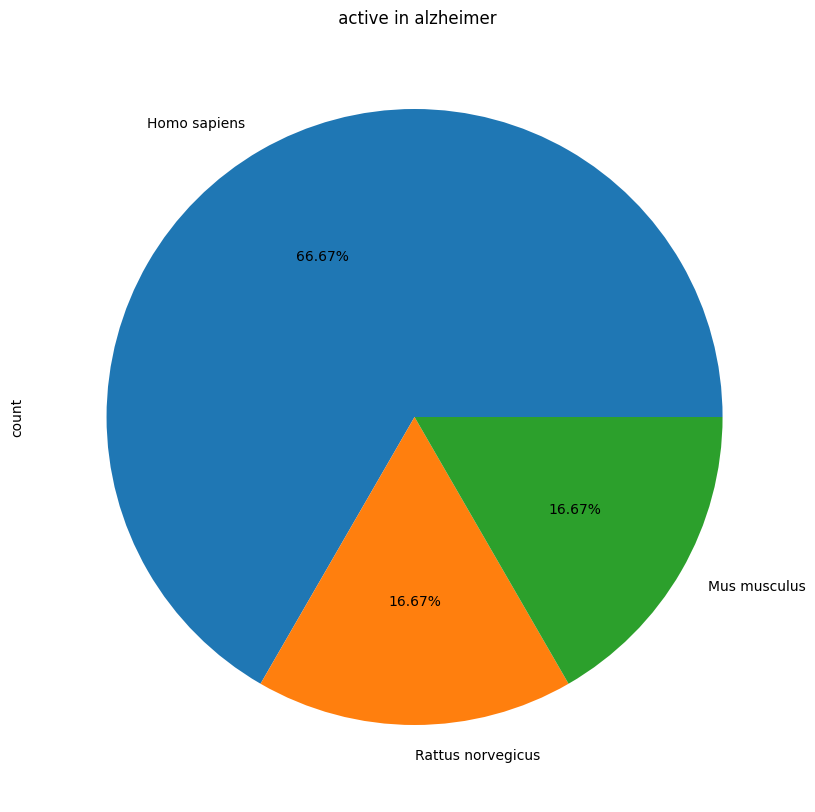

In [4]:
plt.figure(figsize=[10,10])
plt.title(" active in alzheimer")
targets['organism'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.savefig(" active in alzheimer.pdf")

In [5]:
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(result)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,15091465,[],CHEMBL3383407,Inhibition of human BPTF by BROMOscan assay,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,pIC50,None,UO_0000065,None,4.5
1,None,None,16774680,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
2,None,None,16774681,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
3,None,None,18244210,[],CHEMBL4053075,Inhibition of human His tagged FALZ incubated ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
4,None,None,18271028,[],CHEMBL4058607,Displacement of biotinylated histone H3K14 pep...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649981,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
73,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649982,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,25.0
74,None,Not Determined(Insoluble),25649983,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,None,None,None,None
75,None,None,25755772,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5446185,Affinity Biochemical interaction: (AlphaScreen...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,30350.0


In [6]:
df.to_csv('strongest_drug_bioactivity.csv', index=False)

In [7]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-7-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,15091465,[],CHEMBL3383407,Inhibition of human BPTF by BROMOscan assay,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,pIC50,None,UO_0000065,None,4.5
1,None,None,16774680,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
2,None,None,16774681,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
3,None,None,18244210,[],CHEMBL4053075,Inhibition of human His tagged FALZ incubated ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
4,None,None,18271028,[],CHEMBL4058607,Displacement of biotinylated histone H3K14 pep...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649980,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,30.0
72,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649981,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
73,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649982,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,25.0
75,None,None,25755772,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5446185,Affinity Biochemical interaction: (AlphaScreen...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,30350.0


In [8]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,15091465,[],CHEMBL3383407,Inhibition of human BPTF by BROMOscan assay,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,pIC50,None,UO_0000065,None,4.5
1,None,None,16774680,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
2,None,None,16774681,[],CHEMBL3864407,Displacement of biotinylated ligand from recom...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0
3,None,None,18244210,[],CHEMBL4053075,Inhibition of human His tagged FALZ incubated ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
4,None,None,18271028,[],CHEMBL4058607,Displacement of biotinylated histone H3K14 pep...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,nM,UO_0000065,None,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649978,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,220.0
70,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649979,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,380.0
71,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649980,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,30.0
72,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25649981,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5370484,Inhibition of biotinylated-H3K4me2 binding to ...,B,None,None,BAO_0000190,...,Homo sapiens,Nucleosome-remodeling factor subunit BPTF,9606,None,None,IC50,uM,UO_0000065,None,20.0


In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78
1,CHEMBL3959584,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1,20000.0
2,CHEMBL3968533,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...,20000.0
3,CHEMBL4059509,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O,20000.0
4,CHEMBL4097025,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...,20000.0
...,...,...,...
69,CHEMBL5394921,NCC1CC(=O)N(c2ccc(F)c(F)c2)C1,220000.0
70,CHEMBL5394699,CC(=O)N1CCc2c(sc(N)c2C#N)C1,380000.0
71,CHEMBL4982613,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,30000.0
72,CHEMBL5416607,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,20000.0


In [10]:
bioactivity_threshold = []

for i in df3.standard_value:
    try:
        value = float(i)
        if value > 10000:
            bioactivity_threshold.append("inactive")
        elif 1000 <= value <= 5000:
            bioactivity_threshold.append("intermediate")
        elif value < 1000:
            bioactivity_threshold.append("active")
        else:
            bioactivity_threshold.append("unknown")
    except:
        bioactivity_threshold.append("unknown")


In [11]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
dataframe = pd.concat([df3, bioactivity_class], axis=1)
dataframe

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive
1,CHEMBL3959584,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1,20000.0,inactive
2,CHEMBL3968533,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...,20000.0,inactive
3,CHEMBL4059509,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O,20000.0,inactive
4,CHEMBL4097025,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...,20000.0,inactive
...,...,...,...,...
71,CHEMBL4982613,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,30000.0,inactive
72,CHEMBL5416607,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,20000.0,NaN
73,CHEMBL5432936,Fc1ccc(Nc2ccc(N3CCNCC3)nn2)cc1,25000.0,NaN
12,NaN,NaN,NaN,intermediate


In [12]:
dataframe= dataframe.dropna(subset=['molecule_chembl_id'])
dataframe['class'] = dataframe['class'].fillna('unknown')
dataframe

<ipython-input-12-d1882e436182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['class'] = dataframe['class'].fillna('unknown')


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177300,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,31622.78,inactive
1,CHEMBL3959584,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1,20000.0,inactive
2,CHEMBL3968533,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...,20000.0,inactive
3,CHEMBL4059509,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O,20000.0,inactive
4,CHEMBL4097025,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...,20000.0,inactive
...,...,...,...,...
69,CHEMBL5394921,NCC1CC(=O)N(c2ccc(F)c(F)c2)C1,220000.0,inactive
70,CHEMBL5394699,CC(=O)N1CCc2c(sc(N)c2C#N)C1,380000.0,inactive
71,CHEMBL4982613,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,30000.0,inactive
72,CHEMBL5416607,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,20000.0,unknown


In [13]:
dataframe.to_csv('breast_cancer.csv', index=False)

In [14]:

df_no_smiles = dataframe.drop(columns='canonical_smiles')


smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [15]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles = df_clean_smiles.dropna(subset=['molecule_chembl_id'])
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2177300,31622.78,inactive,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...
1,CHEMBL3959584,20000.0,inactive,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1
2,CHEMBL3968533,20000.0,inactive,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...
3,CHEMBL4059509,20000.0,inactive,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O
4,CHEMBL4097025,20000.0,inactive,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...
...,...,...,...,...
69,CHEMBL5394921,220000.0,inactive,NCC1CC(=O)N(c2ccc(F)c(F)c2)C1
70,CHEMBL5394699,380000.0,inactive,CC(=O)N1CCc2c(sc(N)c2C#N)C1
71,CHEMBL4982613,30000.0,inactive,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1
72,CHEMBL5416607,20000.0,unknown,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1


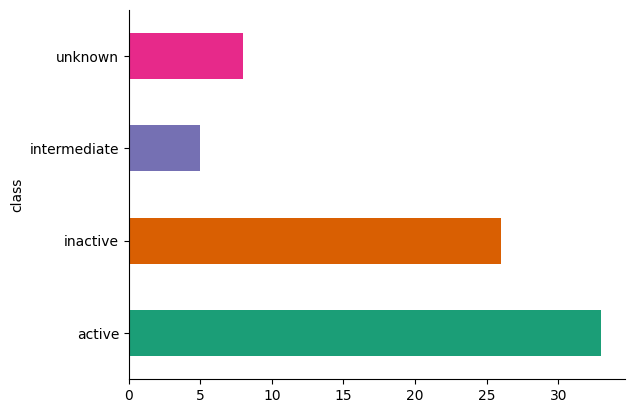

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df_clean_smiles.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [18]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd

def lipinski(smiles, verbose=False):

    moldata = []
    canon_smiles_list = []

    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        if mol:
            canon_smiles = Chem.MolToSmiles(mol, canonical=True)
        else:
            canon_smiles = None
        canon_smiles_list.append(canon_smiles)

    baseData = np.empty((0, 4))
    for mol in moldata:
        if mol:
            desc_MolWt = Descriptors.MolWt(mol)
            desc_MolLogP = Descriptors.MolLogP(mol)
            desc_NumHDonors = Lipinski.NumHDonors(mol)
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

            row = np.array([desc_MolWt,
                            desc_MolLogP,
                            desc_NumHDonors,
                            desc_NumHAcceptors])
        else:
            row = np.array([np.nan, np.nan, np.nan, np.nan])

        baseData = np.vstack([baseData, row])

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    descriptors["Canonical_SMILES"] = canon_smiles_list

    return descriptors



In [20]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors,Canonical_SMILES
0,434.923,6.00350,2.0,3.0,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...
1,256.309,2.05790,2.0,3.0,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1
2,424.480,3.03230,1.0,7.0,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...
3,381.457,3.25628,1.0,5.0,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O
4,525.604,4.35450,1.0,7.0,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...
...,...,...,...,...,...
67,226.226,1.27640,1.0,2.0,NCC1CC(=O)N(c2ccc(F)c(F)c2)C1
68,221.285,1.10658,1.0,4.0,CC(=O)N1CCc2c(sc(N)c2C#N)C1
69,270.340,1.33322,2.0,6.0,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1
70,256.313,1.02480,2.0,6.0,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1


In [21]:
def evaluate_lipinski(row):
    criteria = 0
    if row['MW'] < 500:
        criteria += 1
    if row['LogP'] <= 5:  # Accepts negative or less than 5 values
        criteria += 1
    if row['NumHDonors'] < 5:
        criteria += 1
    if row['NumHAcceptors'] < 10:
        criteria += 1

    if criteria >= 3:
        return "Oral bioavailability likely"
    else:
        return "Low oral bioavailability potential"

df_lipinski['lipinski'] = df_lipinski.apply(evaluate_lipinski, axis=1)

In [22]:

df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors,Canonical_SMILES,lipinski
0,434.923,6.00350,2.0,3.0,CC(=O)N1c2ccc(-c3ccc(C(=O)O)cc3)cc2[C@H](Nc2cc...,Oral bioavailability likely
1,256.309,2.05790,2.0,3.0,CC(=O)N1CCc2[nH]nc(Nc3ccccc3)c2C1,Oral bioavailability likely
2,424.480,3.03230,1.0,7.0,CC(=O)N1CCc2c(c(Nc3ccc(-c4cnn(C)c4)cc3F)nn2[C@...,Oral bioavailability likely
3,381.457,3.25628,1.0,5.0,CCc1cc2cc(NS(=O)(=O)c3ccc(C#N)cc3)ccc2n(CC)c1=O,Oral bioavailability likely
4,525.604,4.35450,1.0,7.0,CNC(=O)N1CCc2c(c(N3CCCc4cc(-c5cnn(C)c5)c(C(F)F...,Oral bioavailability likely
...,...,...,...,...,...,...
67,226.226,1.27640,1.0,2.0,NCC1CC(=O)N(c2ccc(F)c(F)c2)C1,Oral bioavailability likely
68,221.285,1.10658,1.0,4.0,CC(=O)N1CCc2c(sc(N)c2C#N)C1,Oral bioavailability likely
69,270.340,1.33322,2.0,6.0,Cc1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,Oral bioavailability likely
70,256.313,1.02480,2.0,6.0,c1ccc(Nc2ccc(N3CCNCC3)nn2)nc1,Oral bioavailability likely


In [23]:
df_lipinski.to_csv('lipinski rule')

In [24]:
from google.colab import files
files.upload()

Saving padel.sh to padel.sh


{'padel.sh': b'java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv\n'}

In [25]:
from google.colab import files
files.upload()

Saving pade.zip to pade.zip


In [26]:
selection = ['canonical_smiles','molecule_chembl_id']
df_clean_smiles_selection = df_clean_smiles[selection]
df_clean_smiles_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [27]:
! unzip pade.zip

In [28]:

! cat molecule.smi | head -3

In [29]:
! cat padel.sh

In [64]:
! bash padel.sh

Processing CHEMBL2177300 in molecule.smi (1/72). 
Processing CHEMBL3959584 in molecule.smi (2/72). 
Processing CHEMBL3968533 in molecule.smi (3/72). Average speed: 1.57 s/mol.
Processing CHEMBL4059509 in molecule.smi (4/72). Average speed: 1.18 s/mol.
Processing CHEMBL4097025 in molecule.smi (5/72). Average speed: 0.86 s/mol.
Processing CHEMBL4076748 in molecule.smi (6/72). Average speed: 0.79 s/mol.
Processing CHEMBL4583297 in molecule.smi (7/72). Average speed: 0.68 s/mol.
Processing CHEMBL3785432 in molecule.smi (8/72). Average speed: 0.64 s/mol.
Processing CHEMBL4780530 in molecule.smi (9/72). Average speed: 0.57 s/mol.
Processing CHEMBL4873093 in molecule.smi (10/72). Average speed: 0.57 s/mol.
Processing CHEMBL4461619 in molecule.smi (11/72). Average speed: 0.52 s/mol.
Processing CHEMBL4069412 in molecule.smi (13/72). Average speed: 0.51 s/mol.
Processing CHEMBL4846726 in molecule.smi (12/72). Average speed: 0.51 s/mol.
Processing CHEMBL4867912 in molecule.smi (14/72). Average sp

In [65]:
df_total=pd.read_csv('/content/descriptors_output.csv')
df_total

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3959584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3968533,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2177300,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4059509,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4097025,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CHEMBL5394921,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,CHEMBL5394699,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,CHEMBL4982613,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,CHEMBL5416607,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_total.iloc[:, 9]

,PubchemFP8
0,0
1,0
2,0
3,0
4,0
...,...
67,0
68,0
69,0
70,0


In [67]:
df_total = df_total.rename(columns={'Name': 'molecule_chembl_id'})
df4 = df3[['molecule_chembl_id', 'standard_value']]


df_merged = pd.merge(df_total, df4, on='molecule_chembl_id', how='left')
df_merged

,molecule_chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,standard_value
0,CHEMBL3959584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20000.0
1,CHEMBL3968533,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20000.0
2,CHEMBL2177300,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31622.78
3,CHEMBL4059509,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20000.0
4,CHEMBL4097025,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CHEMBL5394921,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,220000.0
68,CHEMBL5394699,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380000.0
69,CHEMBL4982613,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30000.0
70,CHEMBL5416607,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20000.0


In [ ]:
df5 = df_merged.drop(columns=['molecule_chembl_id'])
df5

In [ ]:
df5.dtypes

In [ ]:
print(df5.columns)

In [ ]:
df5 = df5.apply(pd.to_numeric, errors='coerce')
#df5['standard_value'] = pd.to_numeric(df5['standard_value'], errors='coerce')
df5


In [ ]:
df5.to_csv('final data.csv')

In [ ]:
df_all_str = df5.astype(str)
df_clean_numeric = df_all_str.apply(pd.to_numeric, errors='coerce')

# Drop rows where 'standard_value' is NaN
df_clean_numeric = df_clean_numeric.dropna(subset=['standard_value'])

# Compute correlation with 'standard_value'
correlation_with_standard_value = df_clean_numeric.corr()['standard_value'].sort_values(ascending=False)

correlation_with_standard_value

In [ ]:
correlation_matrix = df5.corr()

# Get correlation of each feature with 'standard_value'
correlation_with_standard_value = correlation_matrix['standard_value'].drop('standard_value')
correlation_with_standard_value

<ipython-input-68-8225c5036351>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_8_features.index, y=top_8_features.values, palette='coolwarm')


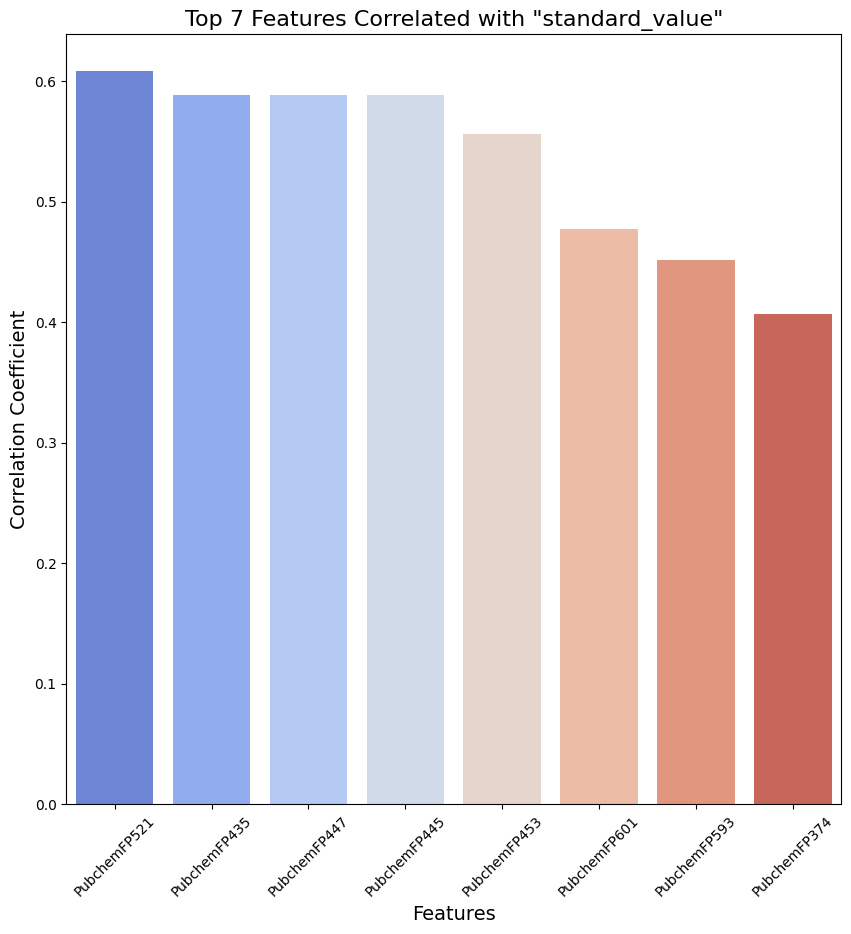

In [68]:
import seaborn as sns



top_8_features = correlation_with_standard_value.abs().sort_values(ascending=False).head(8)

# ایجاد نمودار میله‌ای برای ده ویژگی برتر
plt.figure(figsize=(10, 10))
sns.barplot(x=top_8_features.index, y=top_8_features.values, palette='coolwarm')

# افزودن عنوان و برچسب‌ها
plt.title('Top 7 Features Correlated with "standard_value"', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_8_features

In [ ]:
columns_to_extract = [
    'PubchemFP521', 'PubchemFP445', 'PubchemFP435', 'PubchemFP447',
    'PubchemFP453', 'PubchemFP601', 'PubchemFP593' ,'standard_value',
]


df6 = df5[columns_to_extract].copy()
df6



In [ ]:
import numpy as np

def convert_to_numeric(df):
    df_numeric = pd.DataFrame()

    for col in df.columns:
        col_data = df[col]

        # اگر تمام مقادیر عددی باشن
        if pd.api.types.is_numeric_dtype(col_data):
            df_numeric[col] = col_data

        # اگر مقادیر لیست یا tuple باشن
        elif col_data.apply(lambda x: isinstance(x, (list, tuple))).any():
            df_numeric[col + "_len"] = col_data.apply(lambda x: len(x) if isinstance(x, (list, tuple)) else np.nan)

        # اگر مقادیر دیکشنری باشن
        elif col_data.apply(lambda x: isinstance(x, dict)).any():
            df_numeric[col + "_dict_size"] = col_data.apply(lambda x: len(x) if isinstance(x, dict) else np.nan)

        # اگر object باشه (مثل string)
        elif col_data.apply(lambda x: isinstance(x, str)).any():
            # تلاش برای تبدیل به عدد
            try:
                df_numeric[col] = pd.to_numeric(col_data)
            except:
                df_numeric[col] = col_data.astype("category").cat.codes

        else:
            # در غیر اینصورت تبدیل به category code (یا NaN)
            df_numeric[col] = col_data.astype("category").cat.codes

    return df_numeric


In [ ]:
convert_to_numeric(df6)
df6 = df6.loc[:, (df6 != 0).any(axis=0)]
df6

In [ ]:
df6.to_csv('final data.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df6.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [ ]:
df6['log_standard_value'] = np.log1p(df6['standard_value'])
df6

In [ ]:
df6.drop('standard_value',axis=1,inplace=True)
df6

In [ ]:
Q1 = df6.quantile(0.25)
Q3 = df6.quantile(0.75)
IQR = Q3 - Q1

# شناسایی داده‌های داخل بازه مجاز
df6 = df6[~((df6 < (Q1 - 1.5 * IQR)) | (df6 > (Q3 + 1.5 * IQR))).any(axis=1)]
df6

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df6.drop(columns=["log_standard_value"])
y = df6["log_standard_value"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install xgboost

In [69]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)

xgb_rmse, xgb_mae


(np.float64(1.6314489338324394), 1.2453454732894897)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = xgb_model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


In [ ]:
import numpy as np

# تبدیل همه چیز به float32 برای Keras
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# تعریف مدل شبکه عصبی
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # چون هدف ما پیش‌بینی یک مقدار عددی است
])

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# آموزش مدل
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 50.3735 - mae: 6.6850 - val_loss: 39.6206 - val_mae: 5.7999
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step - loss: 46.8694 - mae: 6.4141 - val_loss: 37.8229 - val_mae: 5.6428
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 44.9870 - mae: 6.2944 - val_loss: 36.2801 - val_mae: 5.5044
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 42.9488 - mae: 6.0916 - val_loss: 34.7977 - val_mae: 5.3681
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 42.5492 - mae: 6.0632 - val_loss: 33.2745 - val_mae: 5.2243
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 39.5054 - mae: 5.7999 - val_loss: 31.5387 - val_mae: 5.0554
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 37.1298 - mae: 5.5663 - val_loss: 29.5617 - val_mae: 4.8560
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 35.0214 - mae: 5.4397 - val_loss: 27.4126 - val_mae: 4.6294
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 32.4082

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# پیش‌بینی روی تست
y_pred_nn = model.predict(X_test).flatten()

# محاسبه MAE و MSE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"MAE: {mae_nn:.4f}")
print(f"MSE: {mse_nn:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
MAE: 1.2281
MSE: 2.6060


In [72]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# تعریف مدل SVM با هسته RBF
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# آموزش مدل
svm_model.fit(X_train_scaled, y_train)

# پیش‌بینی
y_pred_svm = svm_model.predict(X_test_scaled)

# ارزیابی مدل
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"MAE (SVM): {mae_svm:.4f}")
print(f"MSE (SVM): {mse_svm:.4f}")


MAE (SVM): 1.3957
MSE (SVM): 3.1594


In [ ]:
print(df_lipinski.columns)

In [ ]:
df6.to_csv('analysis data in parkinson disease.csv')

